<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
from sklearn.feature_extraction import DictVectorizer
import pandas_profiling
import seaborn
seaborn.set_context('talk')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [3]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv('dataset_new.csv') 
melb_df

,Price,Type,Rooms_group,Bathroom_group,Car_group,date_month,YearBuilt,BuildingArea,Landsize,Suburb,Distance,CouncilArea,Postcode,airbnb_entire_home_price_mean,airbnb_one_room_price_mean,airbnb_location_score_mean
0,1480000.0,h,2,1,1,2016-03,NaN,NaN,202.0,Abbotsford,2.5,Yarra,3067.0,171.934641,70.428571,9.697115
1,1035000.0,h,2,1,0,2016-04,1900.0,79.0,156.0,Abbotsford,2.5,Yarra,3067.0,171.934641,70.428571,9.697115
2,1465000.0,h,3,2,0,2017-04,1900.0,150.0,134.0,Abbotsford,2.5,Yarra,3067.0,171.934641,70.428571,9.697115
3,850000.0,h,3,2,1,2017-04,NaN,NaN,94.0,Abbotsford,2.5,Yarra,3067.0,171.934641,70.428571,9.697115
4,1600000.0,h,4,1,2,2016-04,2014.0,142.0,120.0,Abbotsford,2.5,Yarra,3067.0,171.934641,70.428571,9.697115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,1245000.0,h,4,2,2,2017-08,1981.0,NaN,652.0,Wheelers Hill,16.7,Monash,3150.0,219.647887,66.491525,9.466165
13160,1031000.0,h,3,2,2,2017-08,1995.0,133.0,333.0,Williamstown,6.8,Hobsons Bay,3016.0,205.745763,133.466667,9.717391
13161,1170000.0,h,3,2,3 o más,2017-08,1997.0,NaN,436.0,Williamstown,6.8,Hobsons Bay,3016.0,205.745763,133.466667,9.717391
13162,2500000.0,h,4,1,3 o más,2017-08,1920.0,157.0,866.0,Williamstown,6.8,Hobsons Bay,3016.0,205.745763,133.466667,9.717391


La columna Postcode la habiamos conservado para hacer uno de los ejercicios de la parte 1, pero es redundante con la info de Suburb (se puede ver que cada suburb tiene un unico postcode, y cada postcode puede incluir a varios suburbs). Asi que descartamos Postcode y nos quedamos solo con Suburb.

In [4]:
melb_df[['Suburb', 'Postcode', 'date_month']].groupby(['Suburb', 'Postcode']).count().reset_index().value_counts('Suburb')

Suburb
Abbotsford         1
Mordialloc         1
Niddrie            1
Newport            1
Narre Warren       1
                  ..
Doncaster          1
Docklands          1
Dingley Village    1
Diggers Rest       1
Yarraville         1
Length: 307, dtype: int64

In [5]:
melb_df[['Suburb', 'Postcode', 'date_month']].groupby(['Postcode', 'Suburb']).count().reset_index().value_counts('Postcode')

Postcode
3195.0    5
3023.0    5
3977.0    4
3136.0    4
3021.0    4
         ..
3101.0    1
3099.0    1
3094.0    1
3093.0    1
3128.0    1
Length: 192, dtype: int64

In [6]:
melb_df.drop(columns=['Postcode'], inplace=True)
melb_df

,Price,Type,Rooms_group,Bathroom_group,Car_group,date_month,YearBuilt,BuildingArea,Landsize,Suburb,Distance,CouncilArea,airbnb_entire_home_price_mean,airbnb_one_room_price_mean,airbnb_location_score_mean
0,1480000.0,h,2,1,1,2016-03,NaN,NaN,202.0,Abbotsford,2.5,Yarra,171.934641,70.428571,9.697115
1,1035000.0,h,2,1,0,2016-04,1900.0,79.0,156.0,Abbotsford,2.5,Yarra,171.934641,70.428571,9.697115
2,1465000.0,h,3,2,0,2017-04,1900.0,150.0,134.0,Abbotsford,2.5,Yarra,171.934641,70.428571,9.697115
3,850000.0,h,3,2,1,2017-04,NaN,NaN,94.0,Abbotsford,2.5,Yarra,171.934641,70.428571,9.697115
4,1600000.0,h,4,1,2,2016-04,2014.0,142.0,120.0,Abbotsford,2.5,Yarra,171.934641,70.428571,9.697115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,1245000.0,h,4,2,2,2017-08,1981.0,NaN,652.0,Wheelers Hill,16.7,Monash,219.647887,66.491525,9.466165
13160,1031000.0,h,3,2,2,2017-08,1995.0,133.0,333.0,Williamstown,6.8,Hobsons Bay,205.745763,133.466667,9.717391
13161,1170000.0,h,3,2,3 o más,2017-08,1997.0,NaN,436.0,Williamstown,6.8,Hobsons Bay,205.745763,133.466667,9.717391
13162,2500000.0,h,4,1,3 o más,2017-08,1920.0,157.0,866.0,Williamstown,6.8,Hobsons Bay,205.745763,133.466667,9.717391


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [7]:
#pandas_profiling.ProfileReport(melb_df)

* Escaleo de Variables:
 -  Es necesario escalar las variables numericas para luego poder aplicar el imputador
 -  Las variables a escalar son  Price/YearBuilt/BuildingArea/Landsize/Distance/airbnb_entire_home_price_mean/airbnb_one_room_price_mean/airbnb_location_score_mean 
       -   Se emplea el MinMaxScaler porque conserva la forma de la distribución original. No cambia significativamente la información incrustada en los datos originales.
       El rango predeterminado para la función devuelta por MinMaxScaler es de 0 a 1.

In [8]:
min_max_scaler = MinMaxScaler()

In [9]:
melb_df_1 = melb_df.copy(deep=True)

In [10]:
numeric_cols = ['Price', 'YearBuilt', 'BuildingArea', 'Landsize', 'Distance', 
                'airbnb_entire_home_price_mean', 'airbnb_one_room_price_mean', 'airbnb_location_score_mean']

In [11]:
melb_df_1[numeric_cols] = min_max_scaler.fit_transform(melb_df_1[numeric_cols])
melb_df_1.head()

,Price,Type,Rooms_group,Bathroom_group,Car_group,date_month,YearBuilt,BuildingArea,Landsize,Suburb,Distance,CouncilArea,airbnb_entire_home_price_mean,airbnb_one_room_price_mean,airbnb_location_score_mean
0,0.425305,h,2,1,1,2016-03,NaN,NaN,0.097256,Abbotsford,0.052854,Yarra,0.080298,0.030206,0.858654
1,0.289634,h,2,1,0,2016-04,0.856448,0.011633,0.075108,Abbotsford,0.052854,Yarra,0.080298,0.030206,0.858654
2,0.420732,h,3,2,0,2017-04,0.856448,0.022088,0.064516,Abbotsford,0.052854,Yarra,0.080298,0.030206,0.858654
3,0.233232,h,3,2,1,2017-04,NaN,NaN,0.045258,Abbotsford,0.052854,Yarra,0.080298,0.030206,0.858654
4,0.461890,h,4,1,2,2016-04,0.995134,0.020910,0.057776,Abbotsford,0.052854,Yarra,0.080298,0.030206,0.858654


In [12]:
#pandas_profiling.ProfileReport(melb_df_1)

*  OneHotEncoder
   - Se utilizara la funcion DictVectorizer el cual aplica el OneHotEncoder solo a varibles que son categoricas, y a las variables numericas las concatena a la matriz resultante.
Como en el Ejercicio 2 nos pide agregar la columnas  `BuildingArea` y `YearBuilt` nuevamente, en este punto se opto por no omitir estas columnas, para luego directamente aplicar el imputador.
   - Vamos a reducir el numero de categorias unicas para las variables Suburb y CouncilArea, agrupando las menos comunes en la categoria 'otros'. Para esto definimos una funcion que toma el numero de categorias con las que nos queremos quedar. Para que corran el resto de los algoritmos ponemos un n bastante bajo, asi no se generan tantas columnas al hacer el onehot encoding. Pero si se consta con una computadora mas potente se puede aumentar este n y probablemente obtener mejores resultados en predicciones.

In [13]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13164 entries, 0 to 13163
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Price                          13164 non-null  float64
 1   Type                           13164 non-null  object 
 2   Rooms_group                    13164 non-null  object 
 3   Bathroom_group                 13164 non-null  object 
 4   Car_group                      13164 non-null  object 
 5   date_month                     13164 non-null  object 
 6   YearBuilt                      7947 non-null   float64
 7   BuildingArea                   6908 non-null   float64
 8   Landsize                       13164 non-null  float64
 9   Suburb                         13164 non-null  object 
 10  Distance                       13164 non-null  float64
 11  CouncilArea                    13164 non-null  object 
 12  airbnb_entire_home_price_mean  13164 non-null 

In [14]:
# Deja los top n valores en frecuencia y el resto los pone en otros
def top_n(df, col, n):
    frec = df[col].value_counts()
    frec = frec.to_frame()
    top = list(frec.index)[:n]
    new_col = []
    for value in df[col]:
        if value in top:
            new_col.append(value)
        else:
            new_col.append('otros')
    ret = df.copy()
    ret[col] = new_col
    return ret

In [15]:
melb_df_2 = top_n(melb_df_1, 'Suburb', n=5)
melb_df_2 = top_n(melb_df_2, 'CouncilArea', n=5)
melb_df_2.sample(10)

,Price,Type,Rooms_group,Bathroom_group,Car_group,date_month,YearBuilt,BuildingArea,Landsize,Suburb,Distance,CouncilArea,airbnb_entire_home_price_mean,airbnb_one_room_price_mean,airbnb_location_score_mean
11919,0.179268,h,3,1,1,2017-03,NaN,NaN,0.317285,otros,0.295983,otros,0.090620,0.016959,0.615686
1707,0.179878,h,2,1,1,2016-04,0.939173,0.013253,0.000000,otros,0.241015,Glen Eira,0.053827,0.019166,0.786667
7764,0.454268,h,3,1,0,2017-05,NaN,NaN,0.146846,otros,0.158562,Boroondara,0.108484,0.030202,0.916667
11089,0.143902,h,3,1,2,2017-07,0.947689,NaN,0.277805,otros,0.389006,otros,0.059452,0.017082,0.667677
10817,0.591463,h,4,2,2,2017-12,0.990268,0.040348,0.196437,otros,0.422833,otros,0.110552,0.022268,0.896296
10942,0.112805,h,3,1,1,2017-12,0.953771,0.018407,0.293693,otros,0.310782,otros,0.106348,0.034374,0.672285
12414,0.193902,h,4,2,2,2017-09,NaN,NaN,0.290323,otros,0.378436,otros,0.092601,0.025511,0.688889
8355,0.416159,h,2,1,1,2017-08,NaN,NaN,0.301878,otros,0.232558,Boroondara,0.059031,0.016431,0.803509
2556,0.365244,h,2,1,2,2016-08,NaN,NaN,0.098219,otros,0.073996,otros,0.071959,0.030073,0.892011
6031,0.477134,h,5 o más,3 o más,2,2016-05,0.890511,0.043440,0.343284,otros,0.236786,otros,0.039491,0.029591,0.688889


In [16]:
feature_cols = ['Price', 'Type', 'Rooms_group', 'Bathroom_group', 'Car_group', 'date_month',
                'YearBuilt','BuildingArea','Landsize', 'Suburb', 'Distance','CouncilArea',
                'airbnb_entire_home_price_mean','airbnb_one_room_price_mean','airbnb_location_score_mean']
feature_dict = list(melb_df_2[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Price': 0.4253048780487804,
  'Type': 'h',
  'Rooms_group': '2',
  'Bathroom_group': '1',
  'Car_group': '1',
  'date_month': '2016-03',
  'YearBuilt': nan,
  'BuildingArea': nan,
  'Landsize': 0.09725565719788155,
  'Suburb': 'otros',
  'Distance': 0.052854122621564484,
  'CouncilArea': 'otros',
  'airbnb_entire_home_price_mean': 0.08029812467336626,
  'airbnb_one_room_price_mean': 0.030205695225152884,
  'airbnb_location_score_mean': 0.8586538461538455},
 {'Price': 0.2896341463414634,
  'Type': 'h',
  'Rooms_group': '2',
  'Bathroom_group': '1',
  'Car_group': '0',
  'date_month': '2016-04',
  'YearBuilt': 0.856447688564477,
  'BuildingArea': 0.011633043734354292,
  'Landsize': 0.07510832932113626,
  'Suburb': 'otros',
  'Distance': 0.052854122621564484,
  'CouncilArea': 'otros',
  'airbnb_entire_home_price_mean': 0.08029812467336626,
  'airbnb_one_room_price_mean': 0.030205695225152884,
  'airbnb_location_score_mean': 0.8586538461538455}]

In [17]:
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [18]:
print('Cantidad de columnas:', len(vec.get_feature_names()))
columns_encoding = vec.get_feature_names()
columns_encoding

Cantidad de columnas: 57


['Bathroom_group=1',
 'Bathroom_group=2',
 'Bathroom_group=3 o más',
 'BuildingArea',
 'Car_group=0',
 'Car_group=1',
 'Car_group=2',
 'Car_group=3 o más',
 'CouncilArea=Boroondara',
 'CouncilArea=Darebin',
 'CouncilArea=Glen Eira',
 'CouncilArea=Moonee Valley',
 'CouncilArea=Moreland',
 'CouncilArea=otros',
 'Distance',
 'Landsize',
 'Price',
 'Rooms_group=1',
 'Rooms_group=2',
 'Rooms_group=3',
 'Rooms_group=4',
 'Rooms_group=5 o más',
 'Suburb=Bentleigh East',
 'Suburb=Essendon',
 'Suburb=Preston',
 'Suburb=Reservoir',
 'Suburb=Richmond',
 'Suburb=otros',
 'Type=h',
 'Type=t',
 'Type=u',
 'YearBuilt',
 'airbnb_entire_home_price_mean',
 'airbnb_location_score_mean',
 'airbnb_one_room_price_mean',
 'date_month=2016-01',
 'date_month=2016-03',
 'date_month=2016-04',
 'date_month=2016-05',
 'date_month=2016-06',
 'date_month=2016-07',
 'date_month=2016-08',
 'date_month=2016-09',
 'date_month=2016-10',
 'date_month=2016-11',
 'date_month=2016-12',
 'date_month=2017-01',
 'date_month=201

In [19]:
feature_matrix

<13164x57 sparse matrix of type '<class 'numpy.float64'>'
	with 197460 stored elements in Compressed Sparse Row format>

In [20]:
dense_feature_matrix =feature_matrix.todense()

In [21]:
dense_feature_matrix[0]

matrix([[1.        , 0.        , 0.        ,        nan, 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.05285412,
         0.09725566, 0.42530488, 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 1.        , 0.        ,
         0.        ,        nan, 0.08029812, 0.85865385, 0.0302057 ,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]])

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
Es importante escalar los datos antes de usar métodos basados en distancias, como K nearest neighbors
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

* Sin aplicar el one hot encondig y solo utilizando las columnas 'YearBuilt' y'BuildingArea'

In [22]:
# Primer Metodo con IterariveImputer Imputacion Multiple (MICE)
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df_2.copy(deep=True)
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])

C:\Users\Sofia\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [23]:
print(type(melb_data_mice))
melb_data_mice

<class 'pandas.core.frame.DataFrame'>


,Price,Type,Rooms_group,Bathroom_group,Car_group,date_month,YearBuilt,BuildingArea,Landsize,Suburb,Distance,CouncilArea,airbnb_entire_home_price_mean,airbnb_one_room_price_mean,airbnb_location_score_mean
0,0.425305,h,2,1,1,2016-03,0.947689,0.017700,0.097256,otros,0.052854,otros,0.080298,0.030206,0.858654
1,0.289634,h,2,1,0,2016-04,0.856448,0.011633,0.075108,otros,0.052854,otros,0.080298,0.030206,0.858654
2,0.420732,h,3,2,0,2017-04,0.856448,0.022088,0.064516,otros,0.052854,otros,0.080298,0.030206,0.858654
3,0.233232,h,3,2,1,2017-04,0.947689,0.017700,0.045258,otros,0.052854,otros,0.080298,0.030206,0.858654
4,0.461890,h,4,1,2,2016-04,0.995134,0.020910,0.057776,otros,0.052854,otros,0.080298,0.030206,0.858654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,0.353659,h,4,2,2,2017-08,0.954988,0.023973,0.313914,otros,0.353066,otros,0.118764,0.026801,0.750877
13160,0.288415,h,3,2,2,2017-08,0.972019,0.019585,0.160327,otros,0.143763,otros,0.107556,0.084720,0.868116
13161,0.330793,h,3,2,3 o más,2017-08,0.974453,0.033162,0.209918,otros,0.143763,otros,0.107556,0.084720,0.868116
13162,0.736280,h,4,1,3 o más,2017-08,0.880779,0.023119,0.416948,otros,0.143763,otros,0.107556,0.084720,0.868116


* Con todo el dataset en forma de matris densa, se aplico el one hot encondig

In [24]:
# Primer Metodo con IterariveImputer Imputacion Multiple (MICE)
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice_dense = mice_imputer.fit_transform(dense_feature_matrix)

C:\Users\Sofia\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [25]:
#Con esto se ve como se imputaron los valores que antes eran NAN
print(type(melb_data_mice_dense))
print(melb_data_mice_dense[0])

<class 'numpy.ndarray'>
[1.         0.         0.         0.01487263 0.         1.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.05285412 0.09725566 0.42530488 0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         1.         0.
 0.         0.90754258 0.08029812 0.85865385 0.0302057  0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


In [26]:
dense_feature_matrix[0]

matrix([[1.        , 0.        , 0.        ,        nan, 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.05285412,
         0.09725566, 0.42530488, 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 1.        , 0.        ,
         0.        ,        nan, 0.08029812, 0.85865385, 0.0302057 ,
         0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ]])

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

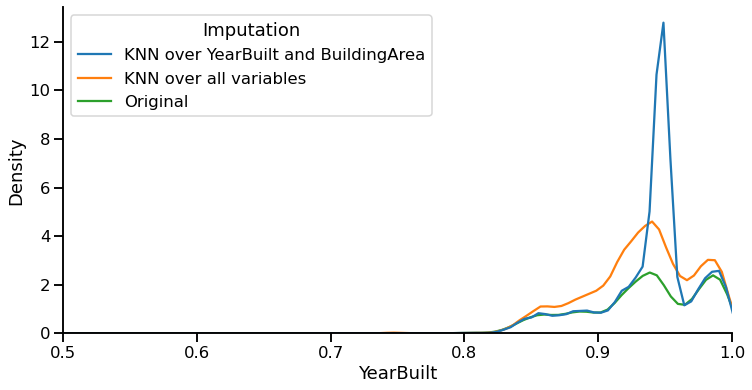

In [27]:
mice_year_build_1 = melb_data_mice.YearBuilt.to_frame()
mice_year_build_1['Imputation'] = 'KNN over YearBuilt and BuildingArea'

mice_year_build_2 = pandas.DataFrame(melb_data_mice_dense, columns=columns_encoding).YearBuilt.to_frame()
mice_year_build_2['Imputation'] = 'KNN over all variables'

melb_year_build = melb_df_1.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data = pandas.concat([mice_year_build_1, mice_year_build_2, melb_year_build])
fig = plt.figure(figsize=(12, 6))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')
g.set(xlim=(0.5, 1))
seaborn.despine()

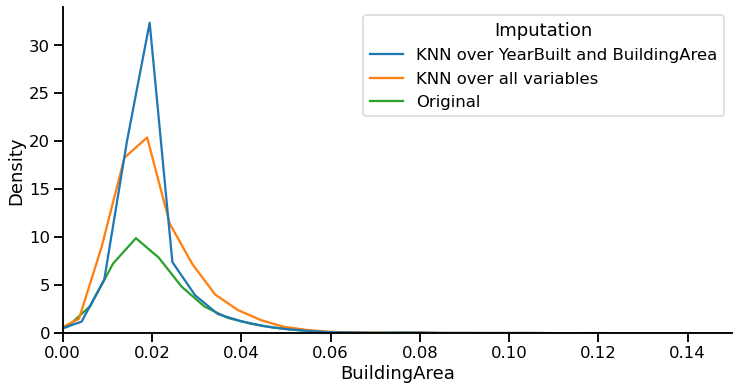

In [28]:
mice_building_area_1 = melb_data_mice.BuildingArea.to_frame()
mice_building_area_1['Imputation'] = 'KNN over YearBuilt and BuildingArea'

mice_building_area_2 = pandas.DataFrame(melb_data_mice_dense, columns=columns_encoding).BuildingArea.to_frame()
mice_building_area_2['Imputation'] = 'KNN over all variables'

melb_building_area = melb_df_1.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Original'

data = pandas.concat([mice_building_area_1, mice_building_area_2, melb_building_area])
fig = plt.figure(figsize=(12, 6))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')
g.set(xlim=(0, 0.15))
seaborn.despine()

In [29]:
# Matriz densa imputada como numpy.ndarray: melb_data_mice_dense
# Matriz imputada como pandas.DataFrame: melb_df_imputed

melb_df_imputed = pandas.DataFrame(melb_data_mice_dense, columns=columns_encoding)
melb_df_imputed

,Bathroom_group=1,Bathroom_group=2,Bathroom_group=3 o más,BuildingArea,Car_group=0,Car_group=1,Car_group=2,Car_group=3 o más,CouncilArea=Boroondara,CouncilArea=Darebin,...,date_month=2017-02,date_month=2017-03,date_month=2017-04,date_month=2017-05,date_month=2017-06,date_month=2017-07,date_month=2017-08,date_month=2017-09,date_month=2017-11,date_month=2017-12
0,1.0,0.0,0.0,0.014873,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.011633,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.022088,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.017906,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.020910,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,0.0,1.0,0.0,0.029333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13160,0.0,1.0,0.0,0.019585,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13161,0.0,1.0,0.0,0.022427,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13162,1.0,0.0,0.0,0.023119,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
melb_df_imputed[['YearBuilt', 'BuildingArea']].info() # Ya no hay mas datos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13164 entries, 0 to 13163
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     13164 non-null  float64
 1   BuildingArea  13164 non-null  float64
dtypes: float64(2)
memory usage: 205.8 KB


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [31]:
n = min(20, melb_df_imputed.shape[0])
print(n)

20


In [32]:
# Here we have to pre-process the matrix before applying PCA
scaled_dense_feature_matrix = melb_df_imputed

In [33]:
scaled_dense_feature_matrix.shape

(13164, 57)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n)
pca.fit(scaled_dense_feature_matrix) #aca entrenamos
proyected_features = pca.transform(scaled_dense_feature_matrix) #aca transformamos
proyected_features.shape

(13164, 20)

In [35]:
pca.explained_variance_ratio_ #el primer componente explica el 18% de la varianza

array([0.1848775 , 0.09293143, 0.07348232, 0.07167677, 0.06201234,
       0.03467684, 0.032954  , 0.03183392, 0.02630121, 0.0250733 ,
       0.02095865, 0.02086699, 0.01929597, 0.01837042, 0.01758656,
       0.01704666, 0.01638   , 0.01569799, 0.015403  , 0.01495331])

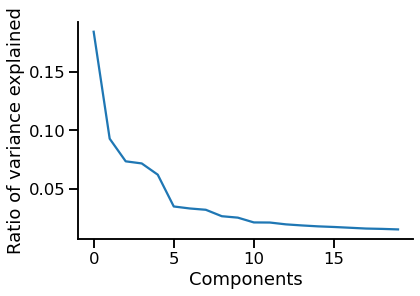

In [36]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
seaborn.despine()

En base al grafico seleccionamos las primeras 5 columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [37]:
scaled_dense_feature_matrix[['pca1_scaled', 'pca2_scaled', 'pca3_scaled', 'pca4_scaled', 'pca5_scaled']] = proyected_features[:,:5]
scaled_dense_feature_matrix

,Bathroom_group=1,Bathroom_group=2,Bathroom_group=3 o más,BuildingArea,Car_group=0,Car_group=1,Car_group=2,Car_group=3 o más,CouncilArea=Boroondara,CouncilArea=Darebin,...,date_month=2017-07,date_month=2017-08,date_month=2017-09,date_month=2017-11,date_month=2017-12,pca1_scaled,pca2_scaled,pca3_scaled,pca4_scaled,pca5_scaled
0,1.0,0.0,0.0,0.014873,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.884889,-0.082108,-0.368893,-0.428024,-0.560183
1,1.0,0.0,0.0,0.011633,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.529708,-0.229854,-0.438949,-0.881390,-0.237871
2,0.0,1.0,0.0,0.022088,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.741377,-0.109969,-0.591033,0.538893,-0.326671
3,0.0,1.0,0.0,0.017906,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.348269,0.039570,-0.527799,1.016456,-0.628136
4,1.0,0.0,0.0,0.020910,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.411216,-0.073597,-0.255423,-1.094087,0.043174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,0.0,1.0,0.0,0.029333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.212905,0.758968,-0.293941,-0.454852,-0.143232
13160,0.0,1.0,0.0,0.019585,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.157610,-0.037083,-0.540378,0.390143,0.323021
13161,0.0,1.0,0.0,0.022427,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.851949,-0.097861,-0.537035,0.585340,-0.527112
13162,1.0,0.0,0.0,0.023119,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.180037,-0.152579,-0.279696,-0.942570,-0.862873


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

Ya lo convertimos en DataFrame al final del ejercicio 2 y se mantuvo así en el ejercicio 3, con lo cual ya tenemos el conjunto de datos procesados en un pandas.DataFrame

In [38]:
scaled_dense_feature_matrix

,Bathroom_group=1,Bathroom_group=2,Bathroom_group=3 o más,BuildingArea,Car_group=0,Car_group=1,Car_group=2,Car_group=3 o más,CouncilArea=Boroondara,CouncilArea=Darebin,...,date_month=2017-07,date_month=2017-08,date_month=2017-09,date_month=2017-11,date_month=2017-12,pca1_scaled,pca2_scaled,pca3_scaled,pca4_scaled,pca5_scaled
0,1.0,0.0,0.0,0.014873,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.884889,-0.082108,-0.368893,-0.428024,-0.560183
1,1.0,0.0,0.0,0.011633,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.529708,-0.229854,-0.438949,-0.881390,-0.237871
2,0.0,1.0,0.0,0.022088,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.741377,-0.109969,-0.591033,0.538893,-0.326671
3,0.0,1.0,0.0,0.017906,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.348269,0.039570,-0.527799,1.016456,-0.628136
4,1.0,0.0,0.0,0.020910,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.411216,-0.073597,-0.255423,-1.094087,0.043174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,0.0,1.0,0.0,0.029333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.212905,0.758968,-0.293941,-0.454852,-0.143232
13160,0.0,1.0,0.0,0.019585,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.157610,-0.037083,-0.540378,0.390143,0.323021
13161,0.0,1.0,0.0,0.022427,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.851949,-0.097861,-0.537035,0.585340,-0.527112
13162,1.0,0.0,0.0,0.023119,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.180037,-0.152579,-0.279696,-0.942570,-0.862873


In [39]:
# Grabamos dataframe resultante
scaled_dense_feature_matrix.to_csv('dataset_procesado.csv', index=False)

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
